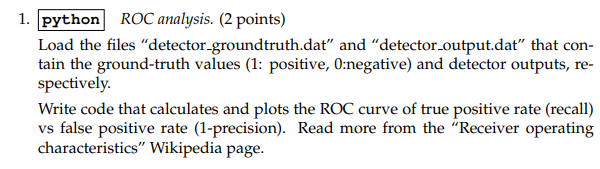

# Task 1 ROC analysis

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import tensorflow as tf


labels = np.loadtxt('detector_groundtruth.dat', dtype=int)
predictions = np.loadtxt('detector_output.dat' , dtype=float)

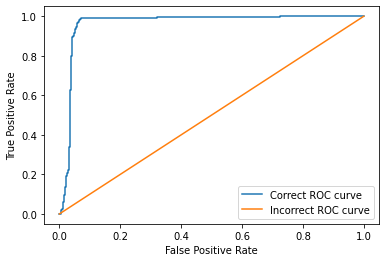

In [57]:
fpr, tpr, tresholds = metrics.roc_curve(labels,  predictions)

predictions_thresholded = predictions > 0.5
tpr2, fpr2, thresholds2 = metrics.roc_curve(labels, predictions_thresholded)

#create ROC curve
plt.plot(tpr,fpr)
plt.plot(fpr2,tpr2)
plt.legend(labels=['Correct ROC curve', 'Incorrect ROC curve'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Task 2) Noisy MNIST Fashion classification


(60000, 28, 28)
(10000, 28, 28)


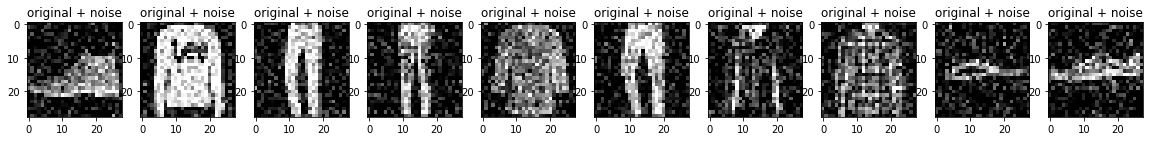

In [58]:
# We are using MNIST Fashion data

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0

test_images = test_images / 255.0

print (train_images.shape)
print (test_images.shape)

# From lectures: Let's add that magical one dimension of keep TF happy
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

noise_factor = 0.2
train_images_noisy = train_images + noise_factor * tf.random.normal(shape=train_images.shape) 
test_images_noisy = test_images + noise_factor * tf.random.normal(shape=test_images.shape) 

# Make sure values still in (0,1)
train_images_noisy = tf.clip_by_value(train_images_noisy, clip_value_min=0., clip_value_max=1.)
test_images_noisy = tf.clip_by_value(test_images_noisy, clip_value_min=0., clip_value_max=1.)

# Print examples..
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(test_images_noisy[i]))
    plt.gray()
plt.show()


In [59]:
print(train_images_noisy.dtype, np.eye(10)[train_labels].shape)

<dtype: 'float32'> (60000, 10)


In [60]:
#Task 2, part 3 defining CNN classification model.

# Defining the model
model = tf.keras.models.Sequential()

# Add hidden layers
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',  padding = 'same', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(52, activation='relu')) # Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Output layer

model.build(input_shape=(None, 28, 28,1)) # Build model 
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 3, 3, 128)       

Epoch 1/20


c:\Conda\lib\site-packages\keras\src\backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 29s 15ms/step - loss: 0.4497 - accuracy: 0.8360
Epoch 2/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2841 - accuracy: 0.8951
Epoch 3/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2369 - accuracy: 0.9132
Epoch 4/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2060 - accuracy: 0.9235
Epoch 5/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1831 - accuracy: 0.9320
Epoch 6/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1659 - accuracy: 0.9387
Epoch 7/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1465 - accuracy: 0.9451
Epoch 8/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1307 - accuracy: 0.9515
Epoch 9/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1152 - accuracy: 0.9572
Epoch 10/20
1875/1875 [==============================] - 28s 15ms/step - lo

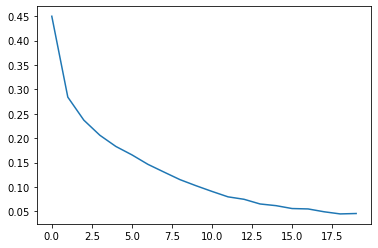

In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=["accuracy"])


history = model.fit(train_images, np.eye(10)[train_labels], epochs=20)


print(f'Accuracy: {history.history["accuracy"][-1]}')

plt.plot(history.history['loss'])

In [62]:
# Report classification accuracy for the clean test images (2 pts)
def classification_accuracy():
    score = model.evaluate(test_images, np.eye(10)[test_labels], verbose = 0) 
    print('Clean images:')
    print('Test loss:', score[0]) 
    print('Test accuracy:', score[1], '\n')

    # Report classification accuracy for the noisy test images (2 pts)
    score = model.evaluate(test_images_noisy, np.eye(10)[test_labels], verbose = 0) 
    print('Noisy images:')
    print('Test loss:', score[0]) 
    print('Test accuracy:', score[1], '\n')
    
classification_accuracy()

Clean images:
Test loss: 0.42867588996887207
Test accuracy: 0.9160000085830688 

Noisy images:
Test loss: 2.348245143890381
Test accuracy: 0.6588000059127808 



In [63]:
# Define a CNN autoencoder model to denoise the noisy images and train it using
# noisy training images - plot examples (2 pts)
from tensorflow.keras.models import Model

class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(28, 28, 1)),
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()


Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0167 - accuracy: 0.5086 - val_loss: 0.0102 - val_accuracy: 0.5073
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0096 - accuracy: 0.5096 - val_loss: 0.0093 - val_accuracy: 0.5074
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0087 - accuracy: 0.5097 - val_loss: 0.0084 - val_accuracy: 0.5076
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0081 - accuracy: 0.5098 - val_loss: 0.0080 - val_accuracy: 0.5076
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0078 - accuracy: 0.5098 - val_loss: 0.0077 - val_accuracy: 0.5076
Accuracy: 0.5098297595977783


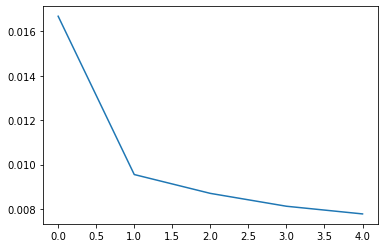

In [64]:
# Compile the model
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(),  metrics=["accuracy"])
# Fit noisy training data
history = autoencoder.fit(train_images_noisy, train_images,
                epochs=5,
                shuffle=True,
                validation_data=(test_images_noisy, test_images))

print(f'Accuracy: {history.history["accuracy"][-1]}')

plt.plot(history.history['loss'])

In [65]:
autoencoder.encoder.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 conv2d_53 (Conv2D)          (None, 7, 7, 8)           1160      
                                                                 
Total params: 1320 (5.16 KB)
Trainable params: 1320 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
autoencoder.decoder.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_32 (Conv2  (None, 14, 14, 8)         584       
 DTranspose)                                                     
                                                                 
 conv2d_transpose_33 (Conv2  (None, 28, 28, 16)        1168      
 DTranspose)                                                     
                                                                 
 conv2d_54 (Conv2D)          (None, 28, 28, 1)         145       
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
# Report classification accuracy for autoencoder denoised test images (2 pts)
encoded_imgs = autoencoder.encoder(test_images).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

score = model.evaluate(decoded_imgs, np.eye(10)[test_labels], verbose = 0) 
print('Decoded images:')
print('Test loss:', score[0]) 
print('Test accuracy:', score[1], '\n')



Decoded images:
Test loss: 0.5651689171791077
Test accuracy: 0.8806999921798706 



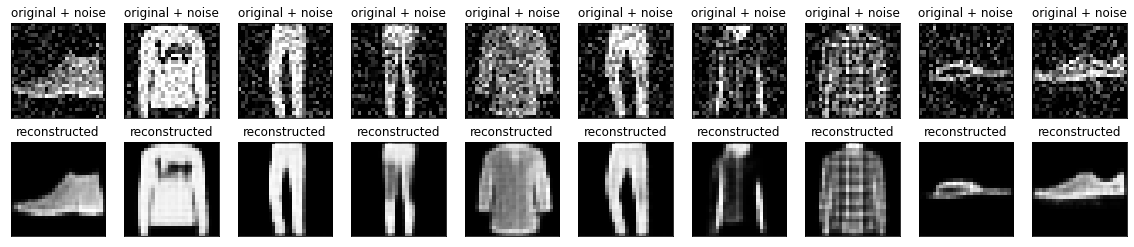

In [68]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(test_images_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

Epoch 1/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3401 - accuracy: 0.8757
Epoch 2/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2324 - accuracy: 0.9113
Epoch 3/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1856 - accuracy: 0.9277
Epoch 4/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1496 - accuracy: 0.9426
Epoch 5/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1237 - accuracy: 0.9521
Epoch 6/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0990 - accuracy: 0.9623
Epoch 7/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0818 - accuracy: 0.9694
Epoch 8/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0705 - accuracy: 0.9740
Epoch 9/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0612 - accuracy: 0.9773
Epoch 10/20
1875/1875 [==============================] - 29s 15m

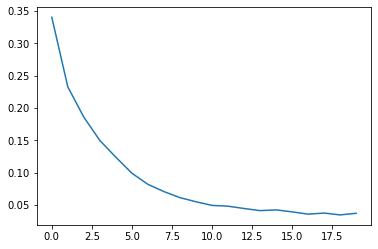

In [69]:
# Train the original model with noisy train images and report accuracy for noisy test images (2 pts)

history = model.fit(train_images_noisy, np.eye(10)[train_labels], epochs=20)


print(f'Accuracy: {history.history["accuracy"][-1]}')

plt.plot(history.history['loss'])

classification_accuracy()